<a href="https://colab.research.google.com/github/ameyas1/TPU_Prediction/blob/master/tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

{}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle


In [0]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification


 97% 333M/344M [00:03<00:00, 108MB/s] 
100% 344M/344M [00:03<00:00, 109MB/s]


In [0]:
import zipfile
with zipfile.ZipFile('/content/intel-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [0]:
import zipfile
with zipfile.ZipFile('seg_test.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [0]:
import zipfile
with zipfile.ZipFile('seg_train.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [0]:
import zipfile
with zipfile.ZipFile('seg_pred.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [0]:
# import os
# import numpy as np
# import copy
# def data_generator(file_path,index_list,batch_size):
#     label_path = os.path.join(file_path,’label')
#     data_path = os.path.join(file_path,’train')
#     original_index_list = index_list
#     while True:
#         x_list = list()
#         y_list = list()
#         index_list = copy.copy(original_index_list)
#         while len(index_list)>0:
#             index = index_list.pop()
#             label_index = index.strip(‘.npy’)+’_label.npy’
#             x_data = np.load(os.path.join(data_path,index))
#             y_data = np.load(os.path.join(label_path,label_index))
#             x_list.append(x_data)
#             y_list.append(y_data)
#             if len(x_list) == batch_size :
#                  yield np.asarray(x_list), np.asarray(y_list)
#                  x_list = list()
#                  y_list = list()
#             #discards the remainder                                               
#             if (len(x_list) > 0 and len(index_list) == 0):
#                  x_list = list()
#                  y_list = list()

In [11]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 1.2MB/s 
     |████████████████████████████████| 3.2MB 25.2MB/s 
     |████████████████████████████████| 368kB 50.9MB/s 
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf


In [0]:
from tensorflow.keras.applications.xception import Xception

In [0]:
model1=Xception()

In [0]:
for layer in model.layers:
  layer.trainable = False

In [59]:
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [0]:
last_layer = model.get_layer('add_6')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [0]:

# x=tf.keras.layers.Activation('relu')(last_output)

x=tf.keras.layers.GlobalAveragePooling2D()(last_output)

# x=tf.keras.layers.Flatten()(last_output)

x=tf.keras.layers.BatchNormalization()(x)

x=tf.keras.layers.Dropout(0.2)(x)

out=tf.keras.layers.Dense(units=6, activation='softmax')(x)

model = tf.keras.Model(model.input, out) 


In [0]:
model.summary()

In [0]:
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Dense
# from keras.layers import Flatten

# import tensorflow as tf

# model=tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) , strides=(1,1) ,padding='same', input_shape=(112,112,3)))

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3) , strides=(1,1) ,padding='same'))

# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.BatchNormalization())

# # model.add(tf.keras.layers.Dense(units=10000, activation='relu' ))

# # model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Dense(units=1000, activation='relu' ))

# model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Dense(units=100, activation='relu' ))

# model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Dense(units=6, activation='softmax' ))


In [0]:
# model.summary()

In [0]:
# model.compile(optimizer=tf.train.AdamOptimizer(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
        model,
        strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://'    + os.environ['COLAB_TPU_ADDR'])
        )
    )


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.77.231.186:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 1793880521265055097)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 10996003555953903279)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15619723760409155060)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU

In [0]:
tpu_model.compile(optimizer=tf.train.AdamOptimizer(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
!rm -r cp

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="cp/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
!mkdir cp

In [16]:
train_set = train_datagen.flow_from_directory(
        'seg_train/',
        target_size=(299, 299),
        batch_size=4*128,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [17]:
test_set = test_datagen.flow_from_directory(
        'seg_test/',
        target_size=(299, 299),
        batch_size=4*128,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [18]:
tpu_model.fit_generator(
        train_set,
        steps_per_epoch=10,
        epochs=60,
        validation_data=test_set,
        validation_steps=2,
        callbacks=callbacks_list)

Epoch 1/60
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(64,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(64, 299, 299, 3), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(64, 6), dtype=tf.float32, name='dense_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input_1
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 90.74692249298096 secs
INFO:tensorflow:Setting weights on TPU model.
16/28 [================>.............] - ETA: 3:17 - loss: 2.2463 - acc: 0.3875INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(26,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(26, 299, 299, 3), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(26, 6), dtype=tf.float32, name='dense_target_10')]
INFO:

In [0]:
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()

In [0]:
# import cv2
# x=cv2.imread('daisy1.jpg')
# x.shape
# x = cv2.resize(x,(128,128))
# x.shape
# import numpy as np
# x = np.expand_dims(x, axis=0)/255
# x.shape
# y=classifier.predict(x)

In [74]:
# inference_model=make_model(batch_size=None)
model=tf.keras.models.load_model('/content/cp/weights-37-0.84.hdf5')

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

[[1.6338015e-05 9.9998152e-01 1.2775175e-07 4.6360507e-09 3.7796077e-09
  2.0107288e-06]]


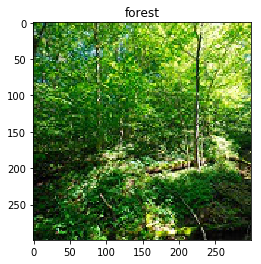

[[9.5724812e-05 8.7770389e-04 2.5289658e-01 7.2982681e-01 1.4597092e-02
  1.7061483e-03]]


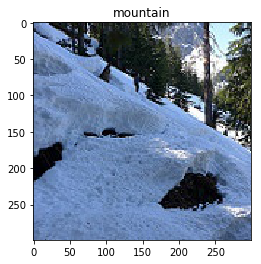

[[9.1137535e-06 3.6775796e-06 2.4520367e-07 1.6874585e-05 9.9996984e-01
  2.8392114e-07]]


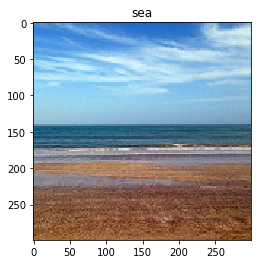

[[7.9752558e-01 1.3087069e-08 5.4534450e-08 1.3398623e-06 2.2449302e-04
  2.0224847e-01]]


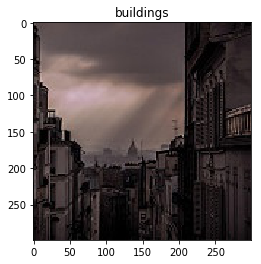

[[8.40839130e-06 1.79599811e-05 2.31970265e-03 9.96832907e-01
  8.20941757e-04 1.16293016e-07]]


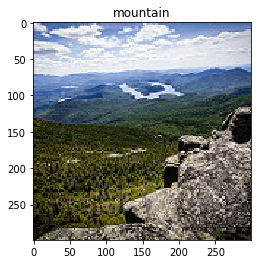

[[1.9037694e-05 5.0139992e-04 6.6031935e-06 5.2471701e-03 9.9421883e-01
  6.9846997e-06]]


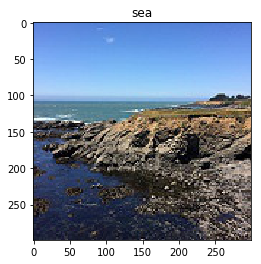

[[1.1700646e-02 3.2543272e-07 1.4017119e-06 4.8482652e-06 1.4550527e-04
  9.8814732e-01]]


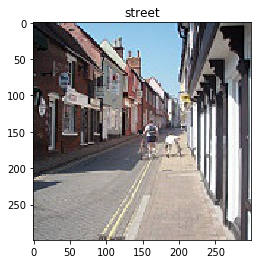

[[1.4319205e-04 4.3923678e-09 1.2968933e-10 4.3112644e-10 3.8889257e-07
  9.9985635e-01]]


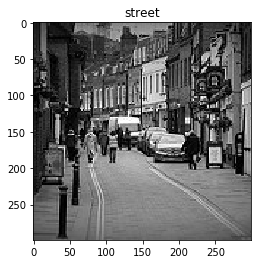

[[8.6467033e-03 2.8785821e-03 6.2597021e-02 9.0415633e-01 2.0914659e-02
  8.0665608e-04]]


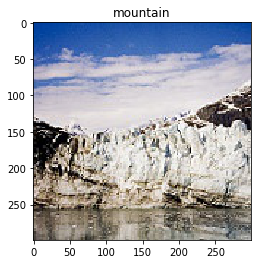

[[4.1860866e-04 9.9415863e-01 1.4122594e-04 6.4910826e-04 9.6843192e-05
  4.5356588e-03]]


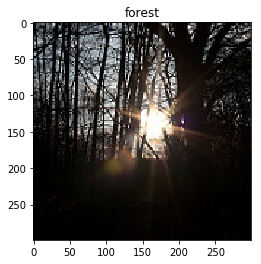

[[9.99985933e-01 3.17435185e-14 7.66793486e-12 5.96405564e-11
  2.22752897e-06 1.17470045e-05]]


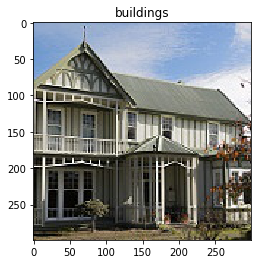

[[9.8761159e-01 2.3766852e-10 4.0289545e-09 1.3640836e-07 1.6341461e-05
  1.2371922e-02]]


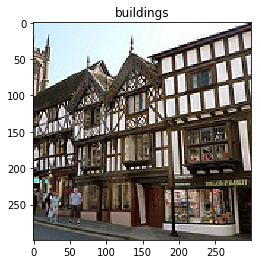

[[1.2865878e-06 2.2067650e-07 3.4868476e-06 5.7744648e-05 9.9993670e-01
  6.5213533e-07]]


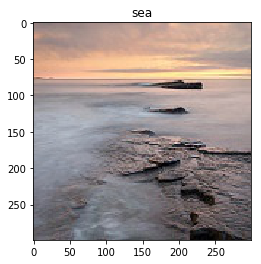

[[3.3164266e-04 9.8265191e-05 5.3260174e-02 9.4549763e-01 8.0954528e-04
  2.8000943e-06]]


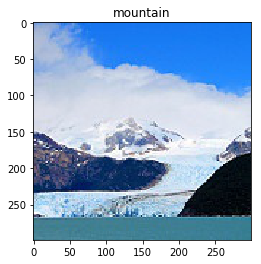

[[9.9733377e-01 3.0037455e-07 2.4299476e-05 4.1235072e-04 9.4250083e-04
  1.2868829e-03]]


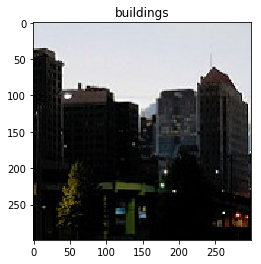

[[1.2941206e-02 9.8532188e-01 6.5594621e-04 1.5462632e-04 8.1757853e-06
  9.1819977e-04]]


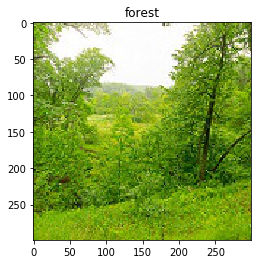

[[7.9236593e-04 8.5186301e-04 1.4713484e-04 2.6891535e-02 9.7113961e-01
  1.7743517e-04]]


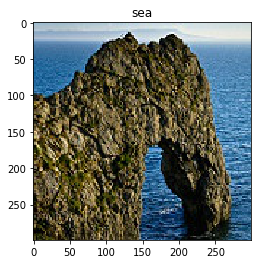

[[8.2898468e-06 5.6808251e-09 1.3227420e-01 8.6771744e-01 1.0173500e-07
  2.6986568e-08]]


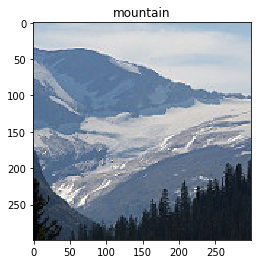

[[6.3524720e-07 9.9999928e-01 3.6982364e-09 1.9943479e-10 3.9382803e-11
  9.1065239e-08]]


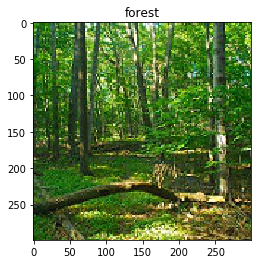

[[1.9453563e-07 4.6901536e-07 1.0651413e-05 8.1452075e-04 9.9917406e-01
  1.5252046e-07]]


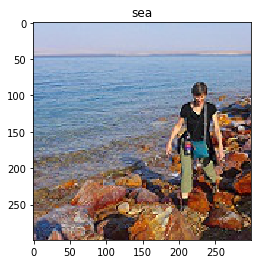

In [79]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt





path='seg_pred/'
classes=['buildings','forest','glacier','mountain','sea','street']
for f in os.listdir(path)[500:520]:
  
  img=image.load_img(path+f, target_size=(299, 299))
  x=image.img_to_array(img)
  x=x/255.
  plt.imshow(x)
  x=np.expand_dims(x, axis=0)
  
  preds=model.predict(x)
  print(preds)
  pred=classes[np.argmax(preds)]
  plt.title(pred)
  plt.show()






